In [1]:
from get_feature_list import get_trading_trend, get_trading_trend_fix, get_feature_info_get, get_shift_feature, get_model_scaler, get_model_heatmap, get_graph

- get_trading_trend_fix() 
1. 삼성 주가 관련 개인, 기관, 외국인 매수동향 정보 가져오기
2. get_feature_list 함수에서 저장위치를 확인 후 변경이 필요함

In [2]:
samsung_etc = get_trading_trend_fix() 

- get_feature_info_get(parameter)
1. 삼성 주가 관련 feature 정보 가져오기(SOXX,qqq,미국국채5년수익률 등)
2. 파라미터로 기존에 수집한 정보들을 넘겨 feature들과 데이터 결합

In [3]:
model_samsung = get_feature_info_get(samsung_etc)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\woori\Downloads\main\get_feature_list.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_samsung[:'2018-05-03']['Volume'] = model_samsung[:'2018-05-03']['Volume'] * 50


In [4]:
model_samsung

,Close,Volume,private,foreign,institution,US,SNP500,SOXX,hang_seng,qqq,vix
2015-01-06,25900.0,15235500.0,476.0,391.0,-891.0,1099.00,2002.609985,82.691116,23485.410156,94.949654,21.12
2015-01-07,26140.0,14322750.0,-748.0,64.0,736.0,1098.74,2025.900024,83.508453,23681.259766,96.173660,19.31
2015-01-09,26280.0,9312400.0,2368.0,-77.0,-2784.0,1085.82,2044.810059,86.034782,23919.949219,97.369179,17.55
2015-01-12,26320.0,8325400.0,-2128.0,1107.0,470.0,1082.72,2028.260010,84.381538,24026.460938,96.353928,19.60
2015-01-13,26780.0,12293400.0,2721.0,-541.0,-3079.0,1078.78,2023.030029,83.554909,24215.970703,96.325447,20.56
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-28,83700.0,31859808.0,19294.0,-15670.0,-3794.0,1112.52,3787.379883,398.369995,28550.769531,321.320007,30.21
2021-01-29,82000.0,39615978.0,16971.0,-14220.0,-2544.0,1117.64,3714.239990,391.420013,28283.710938,314.559998,33.09
2021-02-02,84400.0,26302077.0,-1883.0,1966.0,-131.0,1115.37,3826.310059,413.480011,29248.699219,327.679993,25.56
2021-02-16,84900.0,20483100.0,4226.0,2416.0,-6685.0,1106.58,3932.590088,439.359985,30746.660156,335.540009,21.46


- get_shift_feature(model_samsung)
1. 삼성 종가를 제외한 나머지 feature 들을 하루 shift 하여 하루전의 feature 들 데이터들이 삼성 종가와 어떤 관게가 있을지 파악하기 위한 shift

In [5]:
model_samsung = get_shift_feature(model_samsung)

In [6]:
model_samsung

,Close,Volume_1D_shift,private_1D_shift,foreign_1D_shift,institution_1D_shift,US_1D_shift,SNP500_1D_shift,SOXX_1D_shift,hang_seng_1D_shift,qqq_1D_shift,vix_1D_shift
2015-01-06,25900.0,14322750.0,-748.0,64.0,736.0,1098.74,2025.900024,83.508453,23681.259766,96.173660,19.31
2015-01-07,26140.0,9312400.0,2368.0,-77.0,-2784.0,1085.82,2044.810059,86.034782,23919.949219,97.369179,17.55
2015-01-09,26280.0,8325400.0,-2128.0,1107.0,470.0,1082.72,2028.260010,84.381538,24026.460938,96.353928,19.60
2015-01-12,26320.0,12293400.0,2721.0,-541.0,-3079.0,1078.78,2023.030029,83.554909,24215.970703,96.325447,20.56
2015-01-13,26780.0,14332250.0,719.0,-906.0,-836.0,1082.85,2011.270020,83.081200,24112.599609,95.794121,21.48
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,85600.0,31859808.0,19294.0,-15670.0,-3794.0,1112.52,3787.379883,398.369995,28550.769531,321.320007,30.21
2021-01-28,83700.0,39615978.0,16971.0,-14220.0,-2544.0,1117.64,3714.239990,391.420013,28283.710938,314.559998,33.09
2021-01-29,82000.0,26302077.0,-1883.0,1966.0,-131.0,1115.37,3826.310059,413.480011,29248.699219,327.679993,25.56
2021-02-02,84400.0,20483100.0,4226.0,2416.0,-6685.0,1106.58,3932.590088,439.359985,30746.660156,335.540009,21.46


- get_model_scaler(model_samsung)
1. 데이터들간의 데이터 범주가 다르기 때문에 범주화를 맞추기 위해 0~1로 데이터를 정규화 시킴

In [7]:
scaler_samsung = get_model_scaler(model_samsung)

- get_model_heatmap(scaler_samsung)
1. 삼성 종가와 다른 feature 들 간의 상관관계 표시

C:\Users\woori\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\woori\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


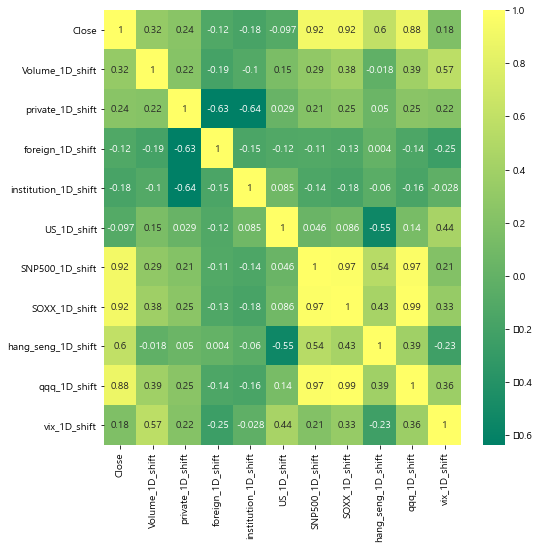

In [8]:
get_model_heatmap(scaler_samsung)

- get_graph(scaler_samsung)
1. 삼성 종가와 다른 feature 들 간의 그래프 표시

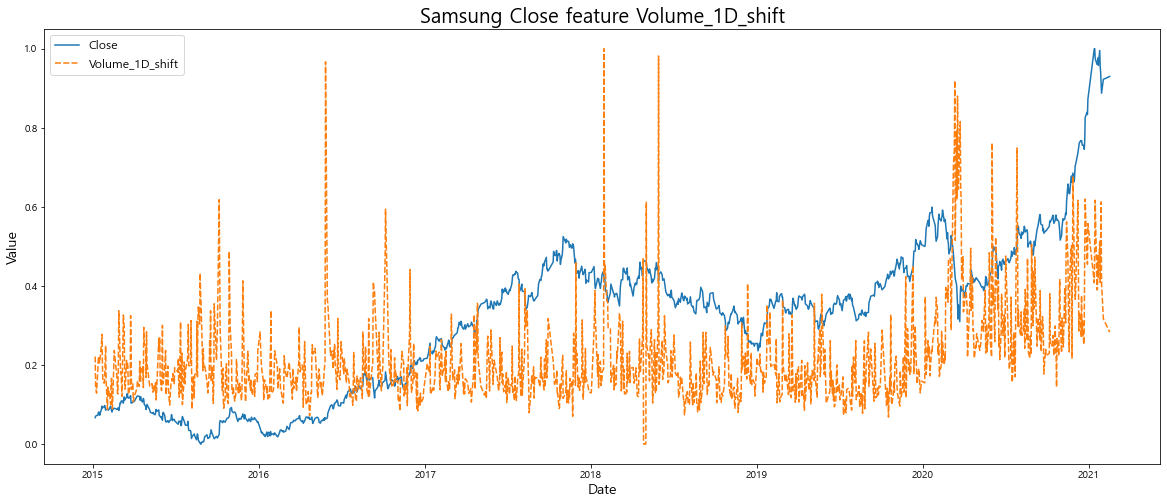

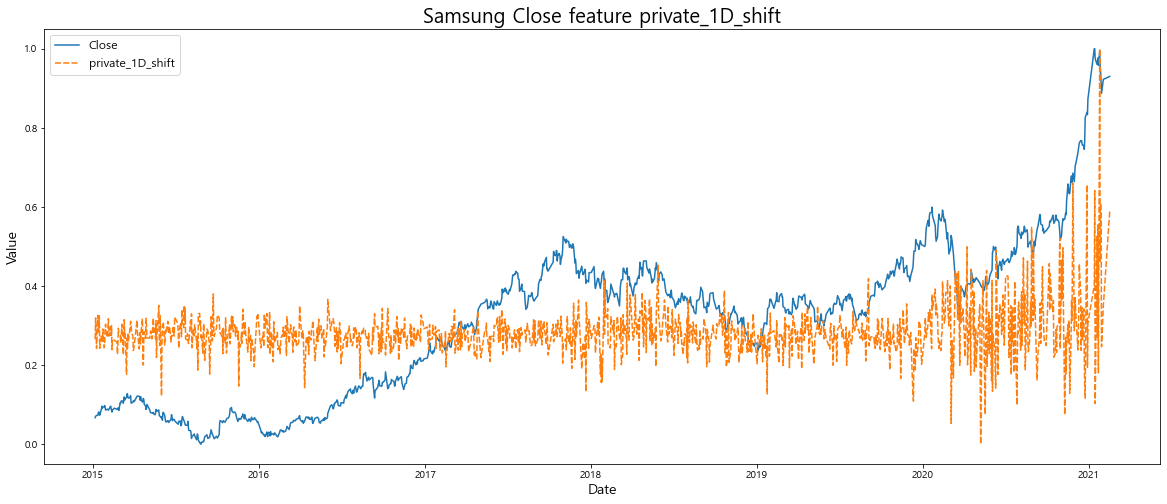

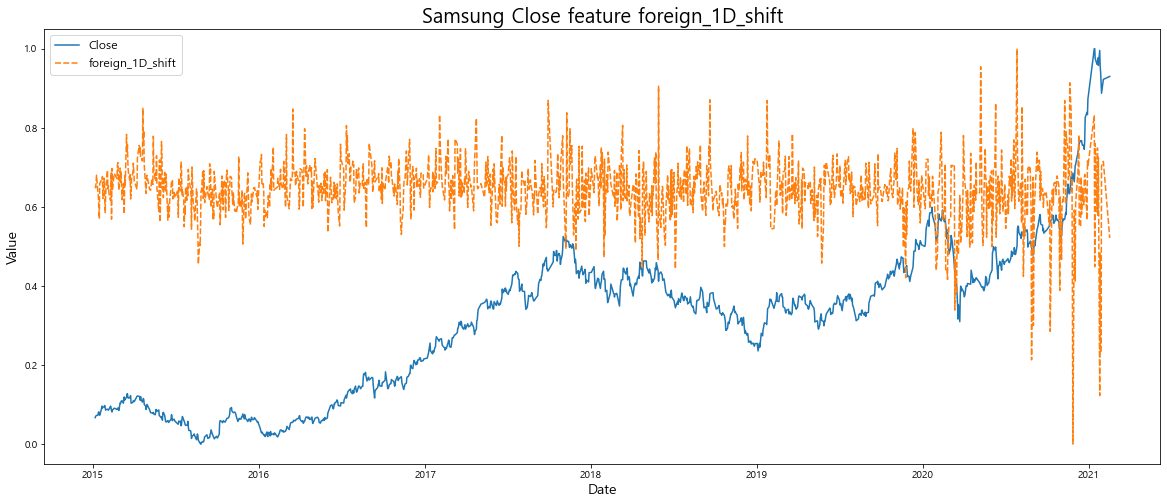

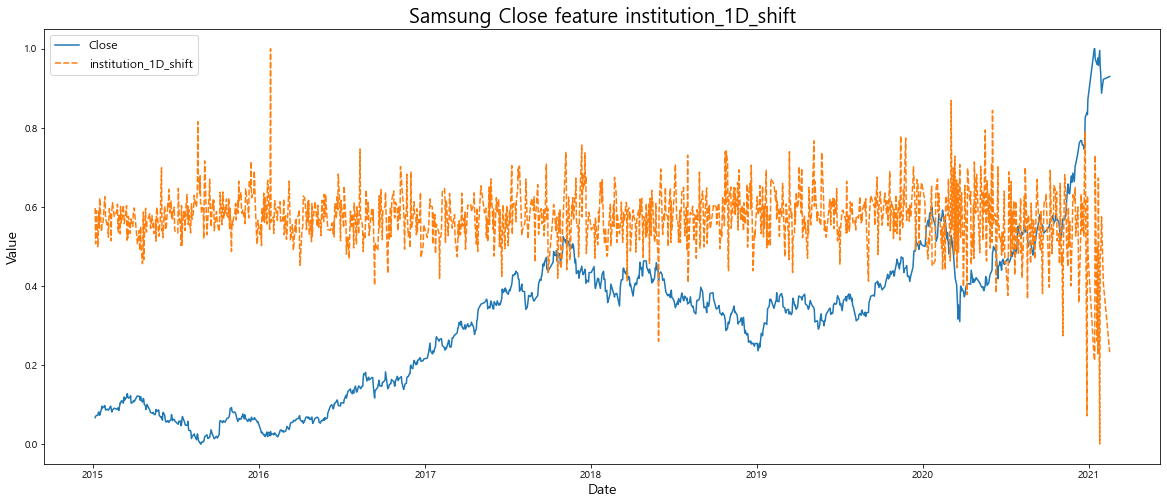

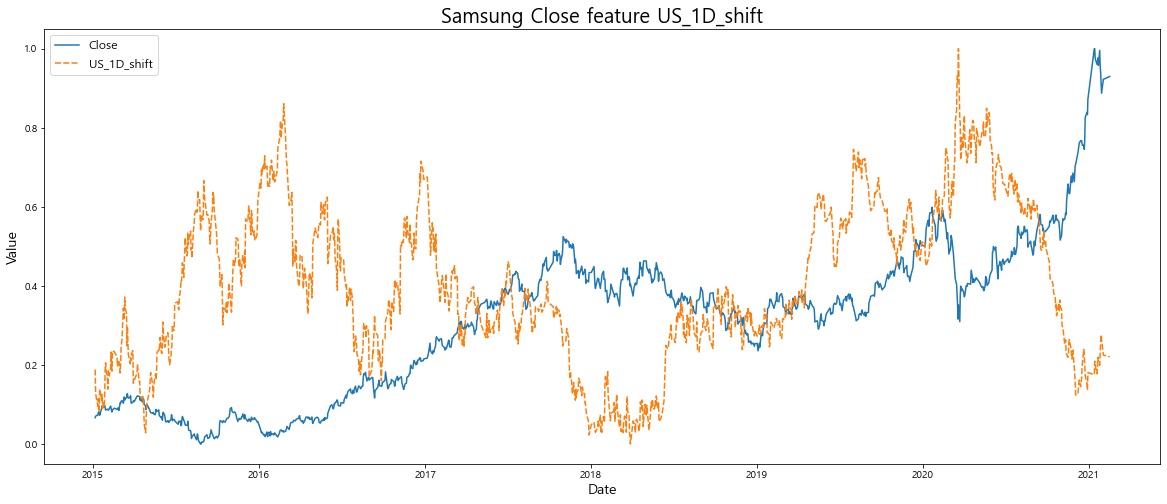

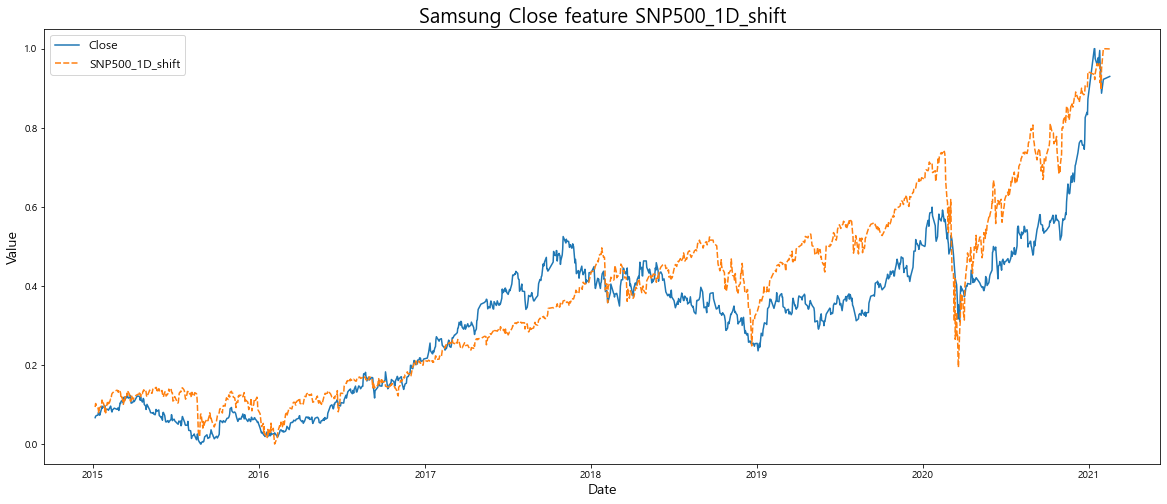

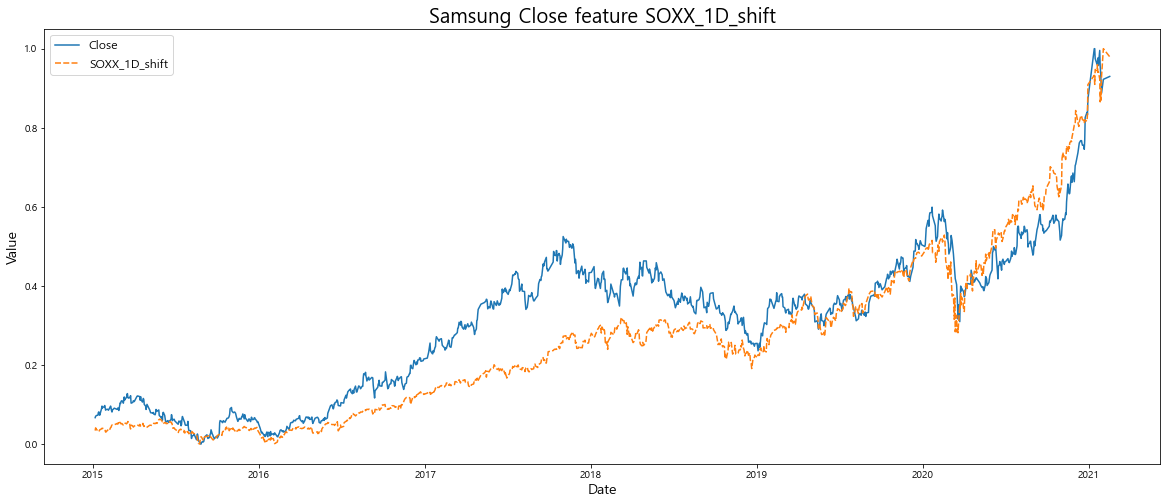

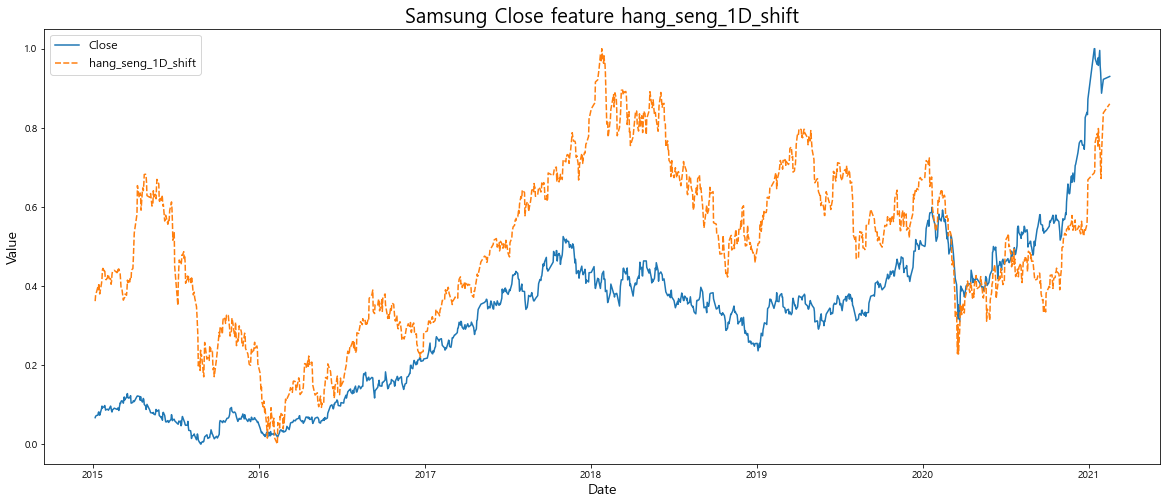

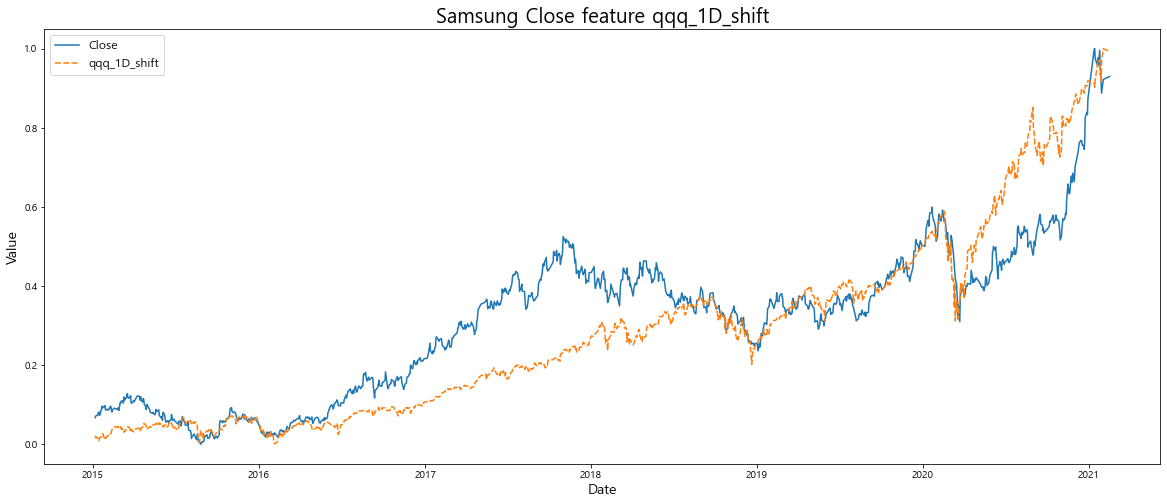

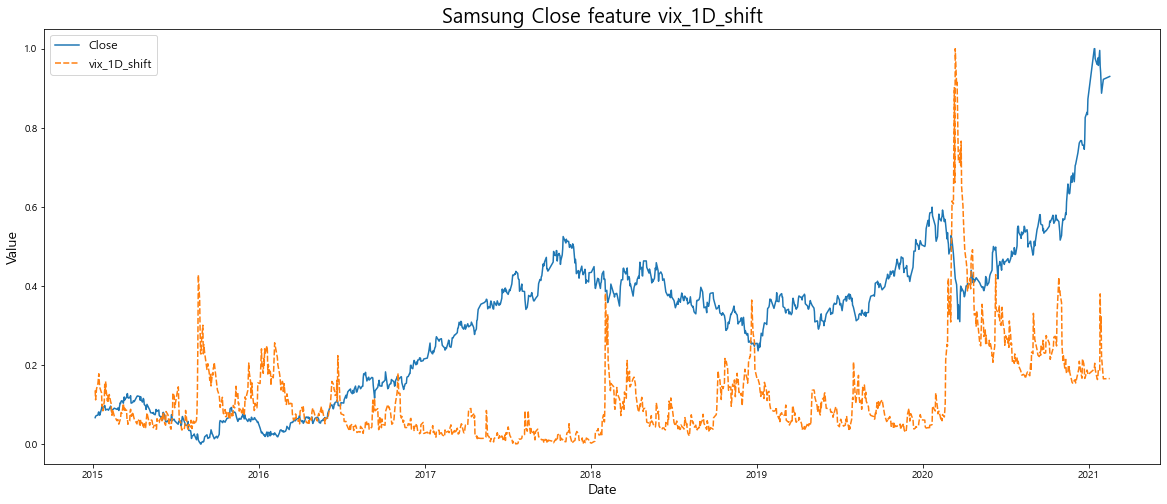

In [9]:
get_graph(scaler_samsung)